In [1]:
from tpot import TPOTClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import metrics
import scikitplot as skplt

In [2]:
# load data
acidoCEST_ML = pd.read_parquet('../clean_data/acido_CEST_MRI_Iopamidol.parquet.gzip')

# drop columns we do not need or that are redundant
cols_2_drop = ['ApproT1(sec)','Temp','FILE','Conc(mM)', 'ExpB0(ppm)']
acidoCEST_ML = acidoCEST_ML.drop(cols_2_drop, axis = 1)

# define experimental columns -- > things we measure other than CEST
exper_cols = ['ExpT1(ms)', 'ExpT2(ms)', 'ExpB1(percent)', 'ExpB0(Hz)', 'SatPower(uT)',  'SatTime(ms)']

acidoCEST_ML.head(2)

In [3]:
acidoCEST_ML.columns

Index(['pH', 'ExpT1(ms)', 'ExpT2(ms)', 'ExpB1(percent)', 'ExpB0(Hz)',
       'SatPower(uT)', 'SatTime(ms)', '-12', '-11', '-10', '-9', '-6', '-3',
       '-2.75', '-2.5', '-2.25', '-2', '-1.8', '-1.6', '-1.4', '-1.2', '-1',
       '-0.8', '-0.6', '-0.4', '-0.2', '0', '0.2', '0.4', '0.6', '0.8', '1',
       '1.2', '1.4', '1.6', '1.8', '2', '2.2', '2.4', '2.6', '2.8', '3', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.8', '7', '7.2', '7.4', '7.6', '7.8', '8',
       '9', '10', '11', '12'],
      dtype='object')

## pH  > 7.0

In [9]:
import numpy as np

In [20]:
Ydata = 1*(acidoCEST_ML.pH > 7)

Xdata = acidoCEST_ML[exper_cols]

In [21]:
X_train, X_test, y_train, y_test = train_test_split( Xdata , Ydata, test_size=0.30, random_state=42)

In [22]:
tpot = TPOTClassifier(generations=10, population_size=10, verbosity=2, n_jobs= 3 , cv = 3,
                      template='Transformer-Selector-Classifier',early_stop=3,max_time_mins=60
                       ,scoring ='precision_weighted')
tpot.fit(X_train,y_train)


Generation 1 - Current best internal CV score: 1.0

Generation 2 - Current best internal CV score: 1.0

Generation 3 - Current best internal CV score: 1.0

Generation 4 - Current best internal CV score: 1.0

The optimized pipeline was not improved after evaluating 3 more generations. Will end the optimization process.

TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: ExtraTreesClassifier(SelectPercentile(ZeroCount(input_matrix), percentile=35), bootstrap=False, criterion=gini, max_features=0.05, min_samples_leaf=1, min_samples_split=17, n_estimators=100)


TPOTClassifier(cv=3, early_stop=3, generations=10, max_time_mins=60, n_jobs=3,
               population_size=10, scoring='precision_weighted',
               template='Transformer-Selector-Classifier', verbosity=2)

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

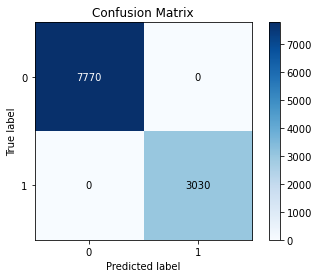

In [23]:
skplt.metrics.plot_confusion_matrix(y_test, tpot.predict(X_test), normalize=False)

In [24]:
print( metrics.classification_report(y_test, tpot.predict(X_test)) )

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7770
           1       1.00      1.00      1.00      3030

    accuracy                           1.00     10800
   macro avg       1.00      1.00      1.00     10800
weighted avg       1.00      1.00      1.00     10800



In [25]:
print( metrics.cohen_kappa_score(y_test, tpot.predict(X_test)) )

1.0


### Next
- Do we need the data at (power=  0.5 and 1.0 uT, sat time = 0.50 or 1.0 seconds) (heat map of error 2d)
- How much does measuring other things beside the Z spectra help?
- Are the regression outlier due to Power and T1
- Effect of noise

- Do these later
2. Can we start with fewer frequencies ?
3. What frequencies are needed ?
5. Max 27 or 25 frequencies
6. pH higher than 6.8




## pH  > 6.5

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( acidoCEST_ML.drop('pH',axis=1) , 1*(acidoCEST_ML.pH > 6.5 ), test_size=0.30, random_state=42)

In [ ]:
tpot = TPOTClassifier(generations=10, population_size=10, verbosity=2, n_jobs= 3 , cv = 3,
                      template='PCA-Selector-Classifier',early_stop=3,max_time_mins=60
                       ,scoring ='precision_weighted')
tpot.fit(X_train,y_train)

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, tpot.predict(X_test), normalize=False)

In [ ]:
print( metrics.classification_report(y_train, tpot.predict(X_train)) )

In [ ]:
tpot.export('acidoCEST_ML_tpot_pH6p5_classifier.py')

In [ ]:
acidoCEST_ML.head()

In [ ]:
metrics.classification_report( 1*(acidoCEST_ML.pH > 6.5), acidoCEST_ML.drop('pH', axis = 1))